In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [36]:
employee_data=pd.read_csv("AAW.csv")


In [37]:
#Get column names
def get_cnames(data):
    all_cnames=[]
    num_cnames=[]
    cat_cnames=[]
    for i in data.columns:
        all_cnames.append(str(i))
        if(data[i].dtype=="object"):
            cat_cnames.append(str(i))
        else:
            num_cnames.append(str(i))
    cnames=[all_cnames,num_cnames,cat_cnames]
    return(cnames)
#get cnames   cnames[0]-all
#cnames[1]-numeric cnames
#cnames[2]-categorical cnames
cnames=get_cnames(employee_data)


#get rows and columns
rows=employee_data.shape[0]
columns=employee_data.shape[1]

In [38]:
cnames[0]

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [39]:
cnames[1]

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [40]:
cnames[2]

['Work load Average/day ']

In [41]:
#Exploratory Data Analysis
for i in cnames[0]:
    print(str(i)+"_"+str(type(employee_data[i][2])))

ID_<class 'numpy.int64'>
Reason for absence_<class 'numpy.float64'>
Month of absence_<class 'numpy.float64'>
Day of the week_<class 'numpy.int64'>
Seasons_<class 'numpy.int64'>
Transportation expense_<class 'numpy.float64'>
Distance from Residence to Work_<class 'numpy.float64'>
Service time_<class 'numpy.float64'>
Age_<class 'numpy.float64'>
Work load Average/day _<class 'str'>
Hit target_<class 'numpy.float64'>
Disciplinary failure_<class 'numpy.float64'>
Education_<class 'numpy.float64'>
Son_<class 'numpy.float64'>
Social drinker_<class 'numpy.float64'>
Social smoker_<class 'numpy.float64'>
Pet_<class 'numpy.float64'>
Weight_<class 'numpy.float64'>
Height_<class 'numpy.float64'>
Body mass index_<class 'numpy.float64'>
Absenteeism time in hours_<class 'numpy.float64'>


In [42]:
#Changing Data as per requirement
for i in range(0,rows):
    if employee_data["Absenteeism time in hours"][i]!=0:
        if employee_data["Reason for absence"][i]==0:
            employee_data["Reason for absence"][i]=np.nan
        if employee_data["Month of absence"][i]==0:
            employee_data["Month of absence"][i]=np.nan
            
    

C:\Users\MyPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [43]:
type(employee_data['Reason for absence'])
cnames[1]


['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [44]:
cat_names=["ID","Reason for absence","Month of absence","Day of the week","Seasons","Education","Son","Social drinker","Social smoker","Pet"]
for i in cat_names:
    print(i)
    employee_data.loc[:,i]=employee_data.loc[:,i].astype(str)

ID
Reason for absence
Month of absence
Day of the week
Seasons
Education
Son
Social drinker
Social smoker
Pet


In [45]:
for i in cnames[0]:
    print(str(i)+"_"+str(type(employee_data[i][1])))

ID_<class 'str'>
Reason for absence_<class 'str'>
Month of absence_<class 'str'>
Day of the week_<class 'str'>
Seasons_<class 'str'>
Transportation expense_<class 'numpy.float64'>
Distance from Residence to Work_<class 'numpy.float64'>
Service time_<class 'numpy.float64'>
Age_<class 'numpy.float64'>
Work load Average/day _<class 'str'>
Hit target_<class 'numpy.float64'>
Disciplinary failure_<class 'numpy.float64'>
Education_<class 'str'>
Son_<class 'str'>
Social drinker_<class 'str'>
Social smoker_<class 'str'>
Pet_<class 'str'>
Weight_<class 'numpy.float64'>
Height_<class 'numpy.float64'>
Body mass index_<class 'numpy.float64'>
Absenteeism time in hours_<class 'numpy.float64'>


In [46]:
cat_names=["ID","Reason for absence","Month of absence","Day of the week","Seasons","Education","Son","Social drinker","Social smoker","Pet"]
for i in cat_names:
    
    employee_data.loc[:,i]=employee_data.loc[:,i].replace("nan",np.nan)

In [47]:
#Converting factor values to various labels
for i in range(0,len(employee_data.columns)):
    if(employee_data.iloc[:,i].dtypes=='object'):
        employee_data.iloc[:,i]=pd.Categorical(employee_data.iloc[:,i])
        employee_data.iloc[:,i]=employee_data.iloc[:,i].cat.codes
        employee_data.iloc[:,i]=employee_data.iloc[:,i].astype('object')

In [48]:
#Convert-1 values back to NAN
for i in cnames[0]:
    for j in range(0,rows):
        if employee_data.loc[j,i]==-1:
            employee_data.loc[j,i]=np.nan
             
            

In [49]:
#Missing Value Analysis
def missing_value_check(data):
    print(data.isna().sum())
missing_value_check(employee_data)    

ID                                  0
Reason for absence                 11
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64


In [50]:
#Impute values related to ID
dependent_ID=["ID","Transportation expense","Service time","Age","Height","Distance from Residence to Work","Education","Son","Weight","Social drinker","Social smoker","Body mass index","Pet"]
dependent_ID_data=employee_data[dependent_ID].copy()
dependent_ID_data=dependent_ID_data.groupby("ID").max()
dependent_ID.remove('ID')
for i in dependent_ID:
    for j in range(0,rows):
        RI=employee_data["ID"][j]
        if np.isnan(employee_data.loc[j,i]):
            employee_data[i][j]=dependent_ID_data.loc[RI,i]

C:\Users\MyPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [51]:
missing_value_check(employee_data)

ID                                  0
Reason for absence                 11
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          22
dtype: int64


In [52]:
employee_data['Month of absence']=employee_data['Month of absence'].fillna(employee_data['Month of absence'].median())

employee_data['Hit target']=employee_data['Hit target'].fillna(employee_data['Hit target'].median())
employee_data['Disciplinary failure']=employee_data['Disciplinary failure'].fillna(employee_data['Disciplinary failure'].median())
employee_data['Absenteeism time in hours']=employee_data['Absenteeism time in hours'].fillna(employee_data['Absenteeism time in hours'].median())




In [53]:
missing_value_check(employee_data)

ID                                  0
Reason for absence                 11
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64


In [57]:
#Outlier analysis
onames = ["Transportation expense","Distance from Residence to Work","Age","Weight","Height","Body mass index","Service time"]
for i in onames:
    q75,q25=np.percentile(employee_data.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25 - (1.5*iqr)
    max=q75 + (1.5*iqr)
    employee_data.loc[employee_data[i]<min,i]=np.nan
    employee_data.loc[employee_data[i]>max,i]=np.nan

        
    

In [58]:

employee_data['Hit target']=employee_data['Hit target'].fillna(employee_data['Hit target'].median())   

In [59]:
missing_value_check(employee_data)

ID                                   0
Reason for absence                  11
Month of absence                     0
Day of the week                      0
Seasons                              0
Transportation expense               3
Distance from Residence to Work      0
Service time                         5
Age                                  8
Work load Average/day               10
Hit target                           0
Disciplinary failure                 0
Education                            0
Son                                  0
Social drinker                       0
Social smoker                        0
Pet                                  0
Weight                               0
Height                             119
Body mass index                      0
Absenteeism time in hours            0
dtype: int64


In [60]:
employee_data['Reason for absence']=employee_data['Reason for absence'].fillna(employee_data['Reason for absence'].median())
employee_data['Transportation expense']=employee_data['Transportation expense'].fillna(employee_data['Transportation expense'].median())
employee_data['Service time']=employee_data['Service time'].fillna(employee_data['Service time'].median())
employee_data['Age']=employee_data['Age'].fillna(employee_data['Age'].median())
employee_data['Height']=employee_data['Height'].fillna(employee_data['Height'].median())

In [61]:
missing_value_check(employee_data)

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64


In [62]:
employee_data['Work load Average/day ']=employee_data['Work load Average/day '].fillna(employee_data['Work load Average/day '].median())

In [63]:
missing_value_check(employee_data)

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64


In [63]:
cnames[1]

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

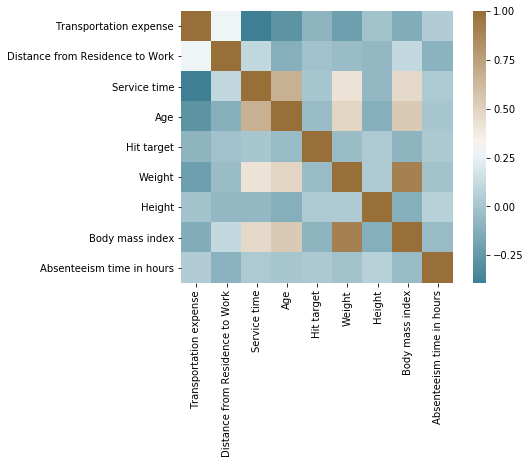

In [65]:
cor=["Transportation expense","Distance from Residence to Work","Service time","Age","Hit target","Weight","Height","Body mass index","Absenteeism time in hours"]
employee_data_corr=employee_data.loc[:,cor]
f,ax=plt.subplots(figsize=(7,5))
corr=employee_data_corr.corr()
import seaborn as sns
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,50,as_cmap=True),square=True,ax=ax)

In [69]:
from sklearn.feature_selection import SelectionKBest
from sklearn.feature_selection import f_regression
X=employee_data.iloc[:,:-1].values
Y=employee_data.iloc[:,20].values
#Create an SelectionKBest object to select features with two best ANOVA F values
selector=SelectKBest(f_regression,k=7)



ImportError: cannot import name 'SelectionKBest' from 'sklearn.feature_selection' (C:\Users\MyPC\Anaconda3\lib\site-packages\sklearn\feature_selection\__init__.py)

In [73]:
employee_data=employee_data.drop(['Weight','Education','Service time','Body mass index','Seasons','Transportation expense','Pet','Disciplinary failure','Month of absence','Hit target','Social drinker','Work load Average/day ','Social smoker'],axis=1)

In [74]:
#Feature Scaling
df=employee_data.copy()
employee_data=df.copy()

AttributeError: Unknown property lines

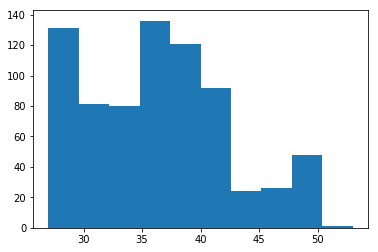

In [75]:
#Normality check
% matplotlib inline
plt.hist(employee_data['Age'],lines='auto')

In [76]:
employee_data

,ID,Reason for absence,Day of the week,Distance from Residence to Work,Age,Son,Height,Absenteeism time in hours
0,2,18.0,1,36.0,33.0,2,172.0,4.0
1,29,0.0,1,13.0,50.0,1,170.0,0.0
2,22,15.0,2,51.0,38.0,0,170.0,2.0
3,33,25.0,3,5.0,39.0,2,168.0,4.0
4,2,15.0,3,36.0,33.0,2,172.0,2.0
5,22,15.0,4,51.0,38.0,0,170.0,3.0
6,1,14.0,4,52.0,28.0,1,172.0,8.0
7,12,15.0,4,50.0,36.0,4,168.0,4.0
8,5,11.0,0,12.0,34.0,2,170.0,40.0
9,0,14.0,0,11.0,37.0,1,172.0,8.0


In [78]:
c_final=['Age','Height','Distance from Residence to Work','Absenteeism time in hours']
for i in c_final:
    print(i)
    employee_data[i]=(employee_data[i]-np.min(employee_data[i]))/(np.max(employee_data[i])-np.min(employee_data[i]))

Age
Height
Distance from Residence to Work
Absenteeism time in hours


In [80]:
employee_data.shape

(740, 8)

In [83]:
#Error metrix
from sklearn.metrics import mean_squared_error
from math import sqrt
def RMSE(y,yhat):
    print(sqrt(mean_squared_error(y,yhat)))
    
def MSE(y,yhat):
    print(mean_squared_error(y,yhat))

In [95]:
X=employee_data.iloc[:,:-1].values
Y=employee_data.iloc[:,7].values
#Splitting the data in train and testing


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [96]:
X_train

array([[15, 0.0, 2, ..., 0.34615384615384615, 2, 0.9],
       [6, 0.0, 1, ..., 0.5, 1, 0.6],
       [34, 0.0, 2, ..., 0.46153846153846156, 2, 0.5],
       ...,
       [2, 11.0, 0, ..., 0.23076923076923078, 2, 0.7],
       [22, 10.0, 0, ..., 0.4230769230769231, 0, 0.5],
       [14, 19.0, 4, ..., 0.11538461538461539, 0, 0.6]], dtype=object)

In [97]:
X_test

array([[5, 11.0, 0, ..., 0.2692307692307692, 2, 0.5],
       [29, 5.0, 2, ..., 0.8846153846153846, 1, 0.5],
       [4, 2.0, 0, ..., 0.15384615384615385, 3, 0.4],
       ...,
       [1, 15.0, 4, ..., 0.038461538461538464, 1, 0.7],
       [22, 20.0, 0, ..., 0.4230769230769231, 0, 0.5],
       [2, 11.0, 3, ..., 0.23076923076923078, 2, 0.7]], dtype=object)

In [100]:
#Multiple Linear Regression:
from sklearn.linear_model import LinearRegression
lm_model=LinearRegression()
lm_model.fit(X_train,Y_train)
lm_predict=lm_model.predict(X_test)

In [101]:
RMSE(Y_test,lm_predict)

0.15845217767172007


In [102]:
MSE(Y_test,lm_predict)

0.025107092608910343


In [105]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor()
DT_model.fit(X_train,Y_train)
DT_predict=DT_model.predict(X_test)
RMSE(Y_test,DT_predict)
MSE(Y_test,DT_predict)

0.20247403087431964
0.04099573317849495


In [106]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor()
RF_model.fit(X_train,Y_train)
RF_predict=RF_model.predict(X_test)
RMSE(Y_test,RF_predict)
MSE(Y_test,RF_predict)

C:\Users\MyPC\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.16560422447328077
0.02742475916339676


In [108]:
#Problem
#Suggesting the changes
RF_Regressor_p1=RandomForestRegressor().fit(X,Y)
RF_Regressor_p1.feature_importances_

array([0.16362349, 0.3939686 , 0.21109382, 0.07875994, 0.06672509,
       0.04073268, 0.04509638])

In [114]:
p2_data=X
#Predicting for new test cases
p2_predict=RF_model.predict(p2_data)
p2_predict=pd.DataFrame(p2_predict)

In [119]:
p2_predict

,0
0,0.046667
1,0.000000
2,0.026594
3,0.128333
4,0.026667
5,0.022583
6,0.056829
7,0.031687
8,0.180000
9,0.063333


In [117]:
#Add predicted values to the data set
p2_frames=[employee_data,p2_predict]
p2_dataset=pd.concat(p2_frames,axis=1)

In [118]:
p2_dataset

,ID,Reason for absence,Day of the week,Distance from Residence to Work,Age,Son,Height,Absenteeism time in hours,0
0,2,18.0,1,36.0,33.0,2,172.0,4.0,0.046667
1,29,0.0,1,13.0,50.0,1,170.0,0.0,0.000000
2,22,15.0,2,51.0,38.0,0,170.0,2.0,0.026594
3,33,25.0,3,5.0,39.0,2,168.0,4.0,0.128333
4,2,15.0,3,36.0,33.0,2,172.0,2.0,0.026667
5,22,15.0,4,51.0,38.0,0,170.0,3.0,0.022583
6,1,14.0,4,52.0,28.0,1,172.0,8.0,0.056829
7,12,15.0,4,50.0,36.0,4,168.0,4.0,0.031687
8,5,11.0,0,12.0,34.0,2,170.0,40.0,0.180000
9,0,14.0,0,11.0,37.0,1,172.0,8.0,0.063333
